In [2]:
from completeRun import featureClf,cv_feature
from preamble import *
from LocalDatasets import saveDict,readDict,ScoresFromPredictions,read_features, read_duration,checkForExist,read_did_pred,ScoresAveraging
import seaborn as sns
from copy import copy
plt.rcParams['savefig.dpi'] = 200
from preamble import *
Cat = [3,20, 21, 26, 333, 334, 335,40668, 4135, 4534, 469, 46, 50]

amountList = [0.25,0.5,0.75,1]
NonCat = [1038,1043,1046,1049,1050,1063,1067,1068,1120,1176,11,12,1459,1462,1464,1466,1467,1468,1475,1476,1478,1479,1485,1487]
second = [1489, 1491, 1492, 1493, 1494, 1497, 14, 1501, 1504, 1510, 1515, 1570, 16, 18, 22, 28, 300, 30, 32, 36, 375, 37, 39,40499,40509,40, 4134, 41, 44, 4538, 458, 53, 54]
for i in second:
    NonCat.append(i)
          
cv = 10
clfNames = [ 'RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf','GaussianNB', 'BernoulliNB','GradientBoost']
# clfNames = ['RandomForestClassifier','KNeighborsClassifier', '1NeighborsClassifier', 'SGDClassifier', 'AdaBoost', 'SVC-rbf','GaussianNB', 'BernoulliNB']

In [6]:
from LocalDatasets import read_did
from sklearn.ensemble import RandomForestClassifier
import sklearn
did = 20
X,y = read_did(did)
XT = list(map(list, zip(*X)))
clf = RandomForestClassifier()
clf.fit(X,y)
mutualIn = []
for i in XT:
    mutualIn.append(sklearn.metrics.normalized_mutual_info_score(i,y))
#     mutualIn.append(sklearn.metrics.adjusted_mutual_info_score(i,y))
#     mutualIn.append(sklearn.metrics.mutual_info_score(i,y))
scaleMutualIn = []
sumM = sum(mutualIn)
for i in mutualIn:
    scaleMutualIn.append(i/sumM)
featsImp = clf.feature_importances_
diff = []
for i,sc in enumerate(scaleMutualIn):
    diff.append(abs(scaleMutualIn[i]-featsImp[i]))
sum(diff)

0.67331204157608882

In [3]:
def remove_feats

[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.001  0.001
  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001
  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001
  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001
  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001
  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001
  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001  0.001
  0.001  0.001  0.001  0.001  0.002  0.002  0.002  0.002  0.002  0.002
  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002
  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002
  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002  0.002
  0.002  0.002  0.002  0.003  0.003  0.003  0.003  0.003  0.003  0.003
  0.003  0.003  0.003  0.003  0.003  0.003  0.003  0.003  0.003  0.003
  

In [9]:
index_min = min(range(len(featsImp)), key=featsImp.__getitem__)

In [10]:
def remove_features_importance(X,y,amount):
    assert amount < len(X[0])
    XT = list(map(list, zip(*X)))
    clf = RandomForestClassifier()
    clf.fit(X,y)
    toRemove = []
    for i in range(amount):
        index_min = min(range(len(featsImp)), key=featsImp.__getitem__)
        toRemove.append(index_min)
        featsImp[index_min] = 1.1
    XT2 = []
    for i,xtj in enumerate(XT):
        if not i in toRemove:
            XT2.append(xtj)
    return list(map(list, zip(*XT2)))
        

225

In [2]:
from completeRun import featureRemoving
did = 20
cv = 10
amount = 1
typ = 0
featureRemoving(did,cv,amount,typ)

KeyboardInterrupt: 

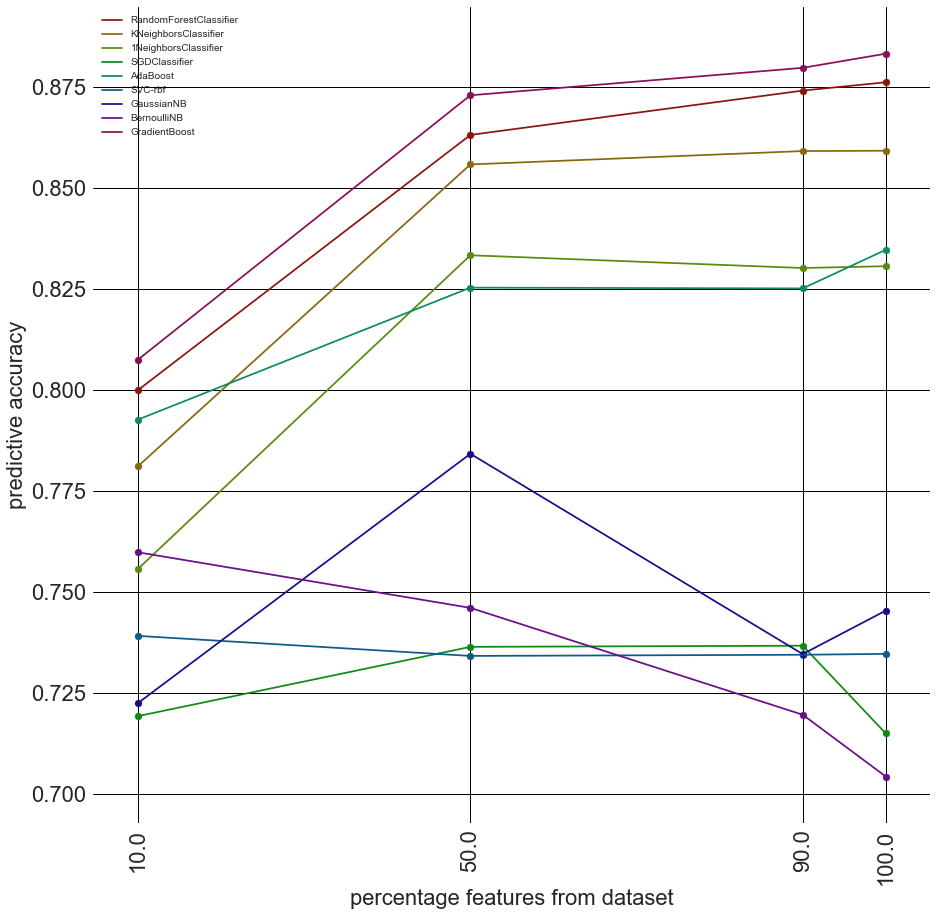

In [4]:
from LocalDatasets import DoneFeatureMan
func = 'featureManipulation'

amountList = [0.1,0.2,0.5,0.8,0.9]
amountList = [0.1,0.5,0.9]
# didList = DoneFeatureMan(func,'1NeighborsClassifier',amountList)
amountList.append(1.0)
amountList.sort()
scores = []
scores2 = []

# amountList = [0.1,0.5,0.8,0.9,1.0,1.1,1.35,1.5,2.0]

# func2 = 'cvScoreFeatures4Fixed'
for i,did in enumerate(didList):
    scores.append([])
    scores2.append([])
    for clfName in clfNames:
        score1 = []
        score2 = []
        for amount in amountList:
            if not amount == 1.0:
                if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                    print(func,clfName,amount,did)
                score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            
        scores[i].append(score1)
score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    score3.append([0 for i in range(len(amountList)+1)])
MaxClass = []
for i,amount in enumerate(amountList):
    if amount == 1.0:
        middle = i
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            if not middle > i:
                score2[j][middle] = score2[j][middle] + (scores[k][j][i][0])/(len(didList)*(len(amountList)-1))
                score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
            else:
                score2[j][middle] = score2[j][middle] + (scores[k][j][i][0])/(len(didList)*(len(amountList)-1))
                score2[j][i] = score2[j][i] + (scores[k][j][i][1])/len(didList)

for i,x in enumerate(amountList):
    amountList[i] = x*100
for i,amount in enumerate(amountList):
    if not amount == round(amount):
        amountList[i] = round(amount)
amountList2 = copy(amountList)
x_axis = amountList
fig, ax = plt.subplots()
# _=plt.title(' accuracy against feature percentage of dataset, features randomly removed' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
#     _=ax.plot(x_axis, score3[i], color = cl[i],ls = ':')
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage features from dataset')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
_=ax.legend()
plt.show()

In [32]:
from LocalDatasets import DoneExperiments
# func = 'FeatureRemoveImportant'
func = 'FeatureRemoveCorrelation'
# func = 'FeatureRemoveMutualInformation'
clfName = clfNames[0]
listie = DoneExperiments(func,clfName)
print(listie)

[{1036: ['108', '194']}, {1038: ['485', '873']}, {1043: ['24', '43']}, {1049: ['18', '33']}, {1050: ['18', '33']}, {1063: ['10', '19']}, {1067: ['10', '19']}, {1068: ['10', '19']}, {1120: ['5', '9']}, {1176: ['1402', '779']}, {12: ['108', '194']}, {1466: ['18', '32']}, {1467: ['10', '18']}, {1468: ['428', '770']}, {1475: ['26', '46']}, {1476: ['115', '64']}, {1478: ['280', '505']}, {1479: ['50', '90']}, {1485: ['250', '450']}, {1487: ['36', '65']}, {1491: ['32', '58']}, {1492: ['32', '58']}, {1493: ['32', '58']}, {1494: ['20', '37']}, {1497: ['12', '22']}, {14: ['38', '68']}, {1501: ['128', '230']}, {1504: ['16', '30']}, {1510: ['15', '27']}, {1515: ['1170', '650']}, {16: ['32', '58']}, {182: ['18', '32']}, {22: ['24', '42']}, {28: ['32', '58']}, {300: ['308', '555']}, {30: ['5', '9']}, {32: ['14', '8']}, {36: ['10', '17']}, {375: ['13', '7']}, {40499: ['20', '36']}, {40509: ['13', '7']}, {40: ['30', '54']}, {4134: ['1598', '888']}, {44: ['28', '51']}, {4538: ['16', '29']}, {458: ['35'

In [33]:
readDict(1036)

{'MajorityClassSize': 13509,
 'MaxNominalAttDistinctValues': -1,
 'MinorityClassSize': 886,
 'NumberOfClasses': 2,
 'NumberOfFeatures': 217,
 'NumberOfInstances': 14395,
 'NumberOfInstancesWithMissingValues': 0,
 'NumberOfMissingValues': 0,
 'NumberOfNumericFeatures': 216,
 'NumberOfSymbolicFeatures': 1,
 'did': 1036,
 'format': 'ARFF',
 'name': 'sylva_agnostic',
 'status': 'active'}

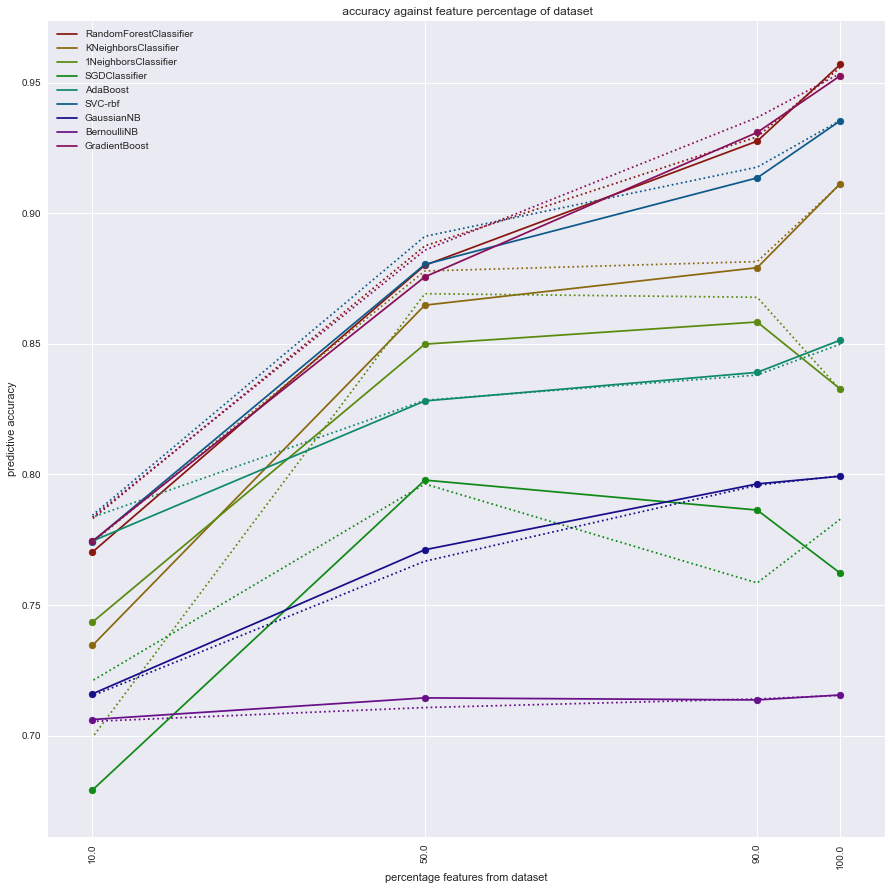

In [4]:
from LocalDatasets import DoneFeatureMan
func3 = 'FeatureRemoveImportant'
func2 = 'FeatureRemoveMutualInformation'

amountList = [0.1,0.5,0.9]
didFunc = DoneFeatureMan(func3,'1NeighborsClassifier',amountList)
didFunc2 = DoneFeatureMan(func2,'1NeighborsClassifier',amountList)
didList = []
for did in didFunc:
    if did in didFunc2:
        didList.append(did)
clean = 0.0
amountList.append(clean)
amountList.sort()
scores = []
scores2 = []

# amountList = [0.1,0.5,0.8,0.9,1.0,1.1,1.35,1.5,2.0]

# func2 = 'cvScoreFeatures4Fixed'
for i,did in enumerate(didList):
    scores.append([])
    scores2.append([])
    for clfName in clfNames:
        score1 = []
        score2 = []
        for amount in amountList:
            if not amount == clean:
                if not checkForExist(func3,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                    print(func3,clfName,amount,did)
                score1.append(read_features(func3,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
                if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                    print(func2,clfName,amount,did)
                score2.append(read_features(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
        scores[i].append(score1)
        scores2[i].append(score2)
score1= [] # func2
score2 = [] #func
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    score3.append([0 for i in range(len(amountList)+1)])
MaxClass = []
for i,amount in enumerate(amountList):
    if amount == clean:
        middle = i
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            if not middle > i:
                score2[j][middle] = score2[j][middle] + (scores[k][j][i][0])/(len(didList)*(len(amountList)-1))
                score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
                score1[j][middle] = score1[j][middle] + (scores2[k][j][i][0])/(len(didList)*(len(amountList)-1))
                score1[j][i+1] = score1[j][i+1] + (scores2[k][j][i][1])/len(didList)
            else:
                score2[j][middle] = score2[j][middle] + (scores[k][j][i][0])/(len(didList)*(len(amountList)-1))
                score2[j][i] = score2[j][i] + (scores[k][j][i][1])/len(didList)
                score1[j][middle] = score1[j][middle] + (scores2[k][j][i][0])/(len(didList)*(len(amountList)-1))
                score1[j][i] = score1[j][i] + (scores2[k][j][i][1])/len(didList)

for i,x in enumerate(amountList):
    amountList[i] = x*100
for i,amount in enumerate(amountList):
    if not amount == round(amount):
        amountList[i] = round(amount)
amountList2 = []
for i in amountList:
    amountList2.append(100-i)
# amountList2 = copy(amountList)
x_axis = amountList2
fig, ax = plt.subplots()
_=plt.title(' accuracy against feature percentage of dataset' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
    _=ax.plot(x_axis, score1[i], color = cl[i], ls = ':')
#     _=ax.plot(x_axis, score3[i], color = cl[i],ls = ':')
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage features from dataset')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
_=ax.legend()
plt.show()

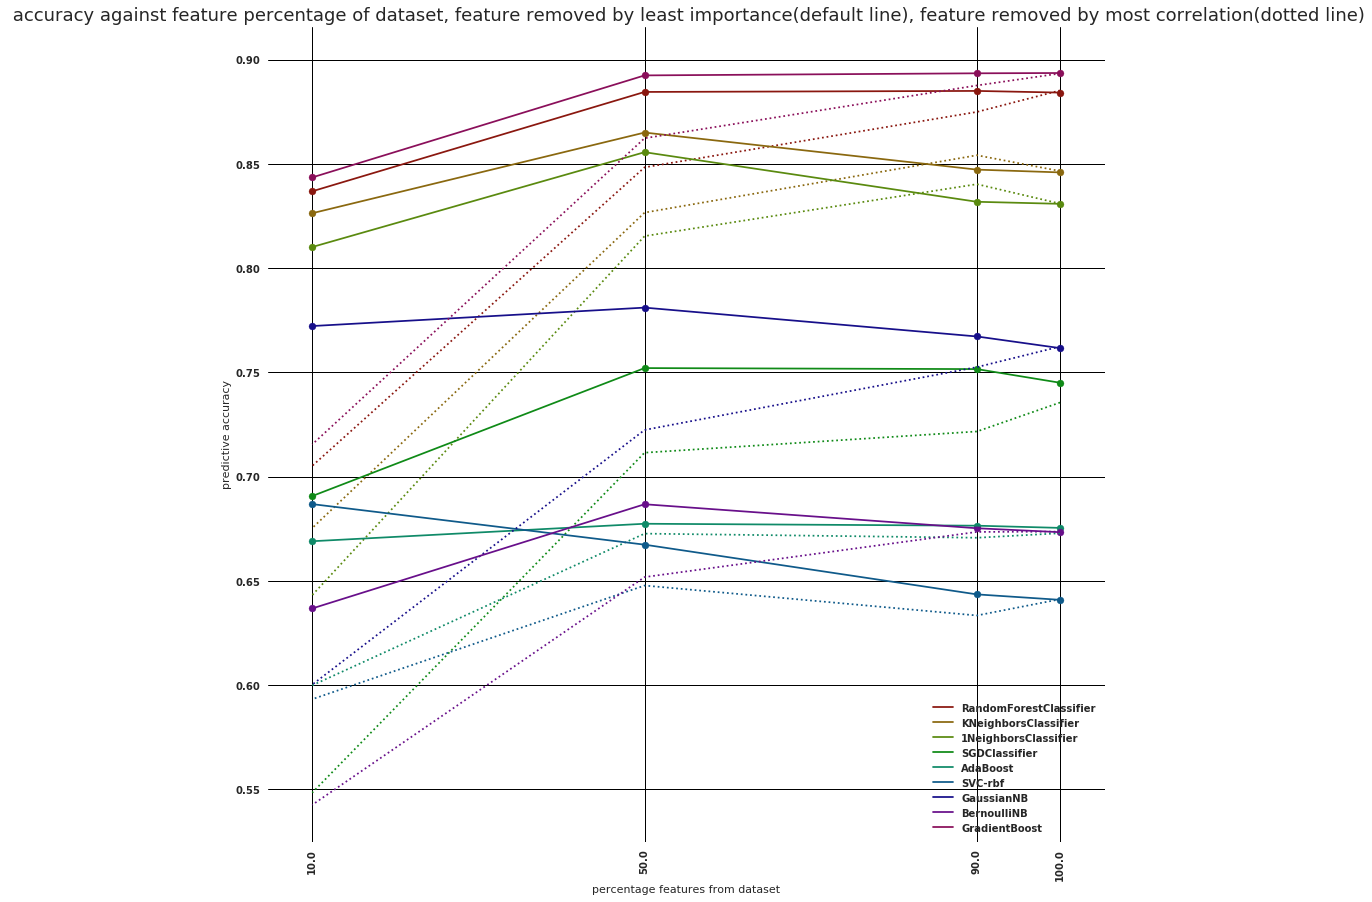

In [6]:
from LocalDatasets import DoneFeatureMan
func = 'FeatureRemoveImportant'
func2 = 'FeatureRemoveCorrelation'

amountList = [0.1,0.5,0.9]
didFunc = DoneFeatureMan(func,'1NeighborsClassifier',amountList)
didFunc2 = DoneFeatureMan(func2,'1NeighborsClassifier',amountList)
didList = []
for did in didFunc:
    if did in didFunc2:
        didList.append(did)
clean = 0.0
amountList.append(clean)
amountList.sort()
scores = []
scores2 = []

# amountList = [0.1,0.5,0.8,0.9,1.0,1.1,1.35,1.5,2.0]

# func2 = 'cvScoreFeatures4Fixed'
for i,did in enumerate(didList):
    scores.append([])
    scores2.append([])
    for clfName in clfNames:
        score1 = []
        score2 = []
        for amount in amountList:
            if not amount == clean:
                if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                    print(func,clfName,amount,did)
                score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
                if not checkForExist(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                    print(func2,clfName,amount,did)
                score2.append(read_features(func2,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
        scores[i].append(score1)
        scores2[i].append(score2)
score1= [] # func2
score2 = [] #func
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    score3.append([0 for i in range(len(amountList)+1)])
MaxClass = []
for i,amount in enumerate(amountList):
    if amount == clean:
        middle = i
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):
            if not middle > i:
                score2[j][middle] = score2[j][middle] + (scores[k][j][i][0])/(len(didList)*(len(amountList)-1))
                score2[j][i+1] = score2[j][i+1] + (scores[k][j][i][1])/len(didList)
                score1[j][middle] = score1[j][middle] + (scores2[k][j][i][0])/(len(didList)*(len(amountList)-1))
                score1[j][i+1] = score1[j][i+1] + (scores2[k][j][i][1])/len(didList)
            else:
                score2[j][middle] = score2[j][middle] + (scores[k][j][i][0])/(len(didList)*(len(amountList)-1))
                score2[j][i] = score2[j][i] + (scores[k][j][i][1])/len(didList)
                score1[j][middle] = score1[j][middle] + (scores2[k][j][i][0])/(len(didList)*(len(amountList)-1))
                score1[j][i] = score1[j][i] + (scores2[k][j][i][1])/len(didList)

for i,x in enumerate(amountList):
    amountList[i] = x*100
for i,amount in enumerate(amountList):
    if not amount == round(amount):
        amountList[i] = round(amount)
amountList2 = []
for i in amountList:
    amountList2.append(100-i)
# amountList2 = copy(amountList)
x_axis = amountList2
# x_axis = amountList
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 26}

plt.rc('font', **font)
fig, ax = plt.subplots()
_=plt.title(' accuracy against feature percentage of dataset, feature removed by least importance(default line), feature removed by most correlation(dotted line)',fontdict = {'fontsize': 18} )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
    _=ax.plot(x_axis, score1[i], color = cl[i], ls = ':')
#     _=ax.plot(x_axis, score3[i], color = cl[i],ls = ':')
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage features from dataset')

fig.set_figheight(15)
fig.set_figwidth(15)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
_=ax.legend()
plt.show()

In [13]:
didList

[12,
 1038,
 14,
 16,
 1043,
 22,
 1176,
 1049,
 1050,
 28,
 1063,
 1067,
 1068,
 300,
 1466,
 1467,
 1468,
 1475,
 1476]

In [3]:
from LocalDatasets import DoneFeatureMan
func3 = 'FeatureRemoveImportant'
func2 = 'FeatureManipulation'
func = 'FeatureRemoveCorrelation'

amountList = [0.1,0.5,0.9]
didFunc = DoneFeatureMan(func3,'1NeighborsClassifier',amountList)
didFunc2 = DoneFeatureMan(func2,'1NeighborsClassifier',amountList)
didFunc3 = DoneFeatureMan(func,'1NeighborsClassifier',amountList)
didList = []
for did in didFunc:
    if did in didFunc2:
        if did in didFunc3:
            didList.append(did)
print(didList)

[1038, 1043, 22, 1176, 1049, 1050, 1063, 1067, 1068]


In [23]:
for did in didList:
    print(readDict(did)['NumberOfFeatures'],readDict(did)['NumberOfInstances'])

971 3468
49 4562
48 2000
1559 3279
38 1458
38 1563
22 522
22 2109
22 1109


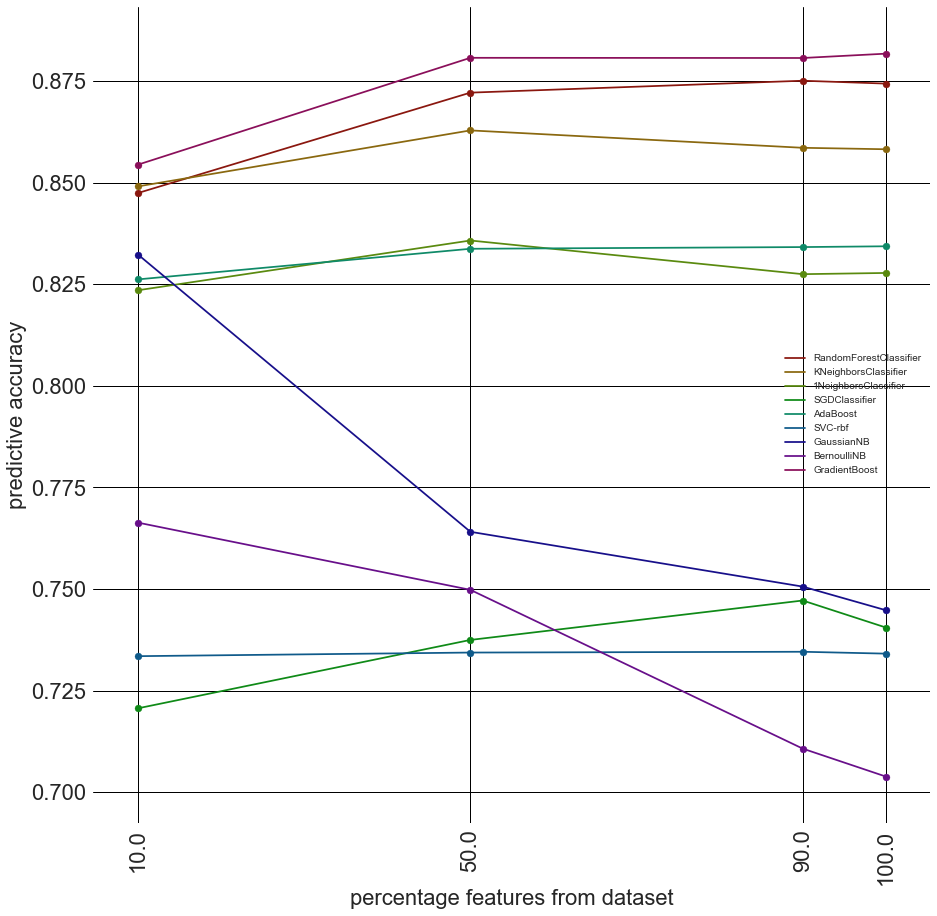

In [5]:
from LocalDatasets import DoneFeatureMan
func = 'featureRemoveImportant'

amountList = [0.1,0.2,0.5,0.8,0.9]
amountList = [0.1,0.5,0.9]
# didList = DoneFeatureMan(func,'1NeighborsClassifier',amountList)
amountList.append(1.0)
amountList.sort()
scores = []
scores2 = []

# amountList = [0.1,0.5,0.8,0.9,1.0,1.1,1.35,1.5,2.0]

# func2 = 'cvScoreFeatures4Fixed'
for i,did in enumerate(didList):
    scores.append([])
    scores2.append([])
    for clfName in clfNames:
        score1 = []
        score2 = []
        for amount in amountList:
            if not amount == 1.0:
                if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                    print(func,clfName,amount,did)
                score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            
        scores[i].append(score1)
score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    score3.append([0 for i in range(len(amountList)+1)])
MaxClass = []
for i,amount in enumerate(amountList):
    if amount == 1.0:
        middle = i
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):            
            score2[j][middle] = score2[j][middle] + (scores[k][j][i][0])/(len(didList)*(len(amountList)-1))
            score2[j][middle-i-1] = score2[j][middle-i-1] + (scores[k][j][i][1])/len(didList)

for i,x in enumerate(amountList):
    amountList[i] = x*100
for i,amount in enumerate(amountList):
    if not amount == round(amount):
        amountList[i] = round(amount)
amountList2 = copy(amountList)
x_axis = amountList
fig, ax = plt.subplots()
# _=plt.title(' accuracy against feature percentage of dataset, features removed by least Importance' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
#     _=ax.plot(x_axis, score3[i], color = cl[i],ls = ':')
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage features from dataset')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
_=ax.legend()
plt.show()

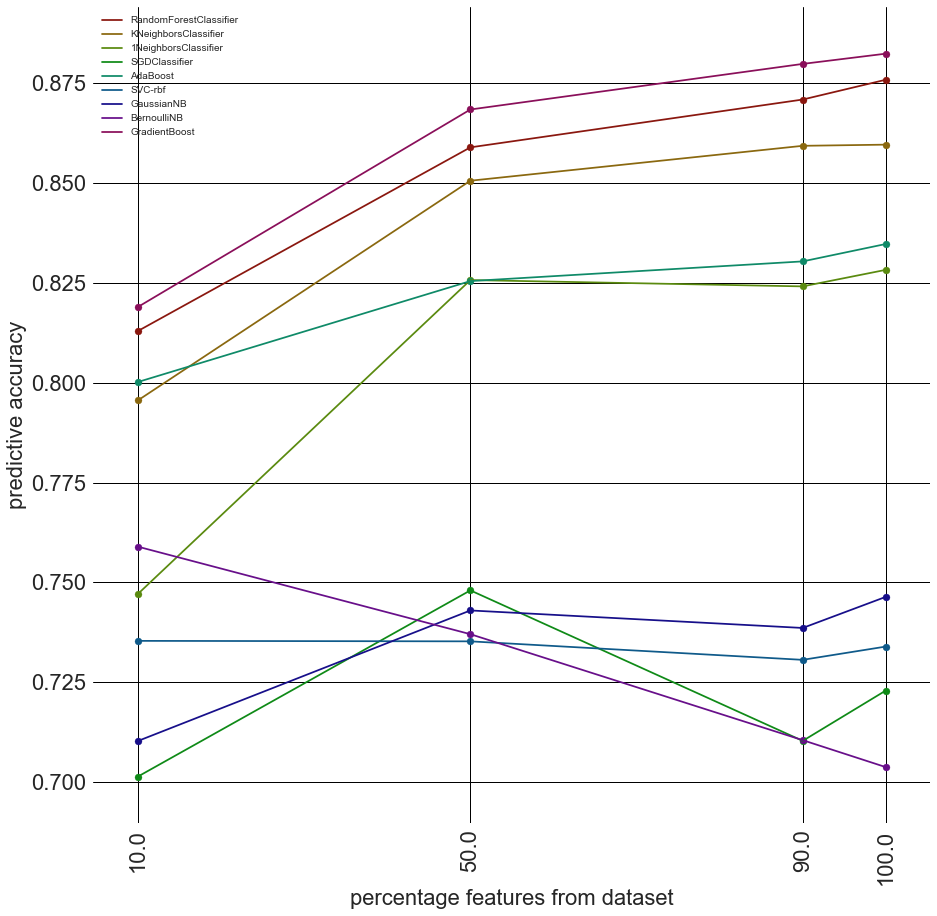

In [6]:
from LocalDatasets import DoneFeatureMan
func = 'featureRemoveCorrelation'

amountList = [0.1,0.2,0.5,0.8,0.9]
amountList = [0.1,0.5,0.9]
# didList = DoneFeatureMan(func,'1NeighborsClassifier',amountList)
amountList.append(1.0)
amountList.sort()
scores = []
scores2 = []

# amountList = [0.1,0.5,0.8,0.9,1.0,1.1,1.35,1.5,2.0]

# func2 = 'cvScoreFeatures4Fixed'
for i,did in enumerate(didList):
    scores.append([])
    scores2.append([])
    for clfName in clfNames:
        score1 = []
        score2 = []
        for amount in amountList:
            if not amount == 1.0:
                if not checkForExist(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))):
                    print(func,clfName,amount,did)
                score1.append(read_features(func,clfName,did,round(amount*(readDict(did)['NumberOfFeatures']-1))))
            
        scores[i].append(score1)
score1= []
score2 = []
score3 = []
ratio = []
for i in clfNames:
    score1.append([0 for i in range(len(amountList))])
    score2.append([0 for i in range(len(amountList))])
    score3.append([0 for i in range(len(amountList)+1)])
MaxClass = []
for i,amount in enumerate(amountList):
    if amount == 1.0:
        middle = i
for k,x in enumerate(scores):
    for j in range(0,len(x)):    
        for i in range(0,len(x[j])):            
            score2[j][middle] = score2[j][middle] + (scores[k][j][i][0])/(len(didList)*(len(amountList)-1))
            score2[j][middle-i-1] = score2[j][middle-i-1] + (scores[k][j][i][1])/len(didList)

for i,x in enumerate(amountList):
    amountList[i] = x*100
for i,amount in enumerate(amountList):
    if not amount == round(amount):
        amountList[i] = round(amount)
amountList2 = copy(amountList)
x_axis = amountList
fig, ax = plt.subplots()
# _=plt.title(' accuracy against feature percentage of dataset, features removed by most correlation' )
cl = sns.hls_palette(len(score1), l=.3, s=.8)
for i in range(0,len(clfNames)):
#     _=ax.plot(amountList2, score1[i], color = cl[i])
    _=ax.plot(x_axis, score2[i],label=clfNames[i], color = cl[i])
    _=ax.scatter(x_axis, score2[i], color = cl[i])
#     _=ax.plot(x_axis, score3[i], color = cl[i],ls = ':')
_=plt.xticks(x_axis,x_axis ,rotation='vertical')
_=plt.ylabel('predictive accuracy')
_=plt.xlabel('percentage features from dataset')
fig.set_figheight(15)
fig.set_figwidth(15)
plt.grid(True,color='black')
ax.set_facecolor('xkcd:white')
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(22)
_=ax.legend()
plt.show()

In [7]:
didList

[12,
 1038,
 14,
 16,
 1043,
 22,
 1176,
 1049,
 1050,
 28,
 1063,
 1067,
 1068,
 300,
 1466,
 1467,
 1468,
 1475,
 1476]